<a href="https://colab.research.google.com/github/prateek66/deep_learning/blob/main/Cattle_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Become one with the data

## Create the dataset

In [ ]:
#download from google drive
! gdown --id 1Hsu4rprJF0yc55osI25LdqGwKhuMyHKC

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hsu4rprJF0yc55osI25LdqGwKhuMyHKC
To: /content/cattle_breed.zip
100% 3.05G/3.05G [00:25<00:00, 119MB/s]


In [4]:
#Running
!apt install subversion
!svn checkout https://github.com/prateek66/deep_learning.git


^C
Checked out revision 8.


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("cattle_breed.zip")
zip_ref.extractall();
zip_ref.close()

FileNotFoundError: ignored

In [3]:
import os
path = "/content/deep_learning.git/trunk/Downloads/Indian_bovine_breeds"
print(os.listdir(path))

['cow', 'buffalo']


In [3]:
!pip install split-folders[full]
import splitfolders

splitfolders.ratio("/content/deep_learning.git/trunk/Downloads/Indian_bovine_breeds", # The location of dataset
                   output="/content/dataSet", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .0, .3), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

Copying files: 1821 files [00:02, 638.46 files/s] 


In [8]:
import os
lst = os.listdir("/content/dataSet/test/cow") # your directory path
number_files = len(lst)
print(number_files)

294


In [ ]:
ls /content/cattle_breeds

Alambadi/     Gir/                Kasargod/        Nagpuri/     Surti/
Amritmahal/   Guernsey/           Kenkatha/        Nili_Ravi/   Tharparkar/
Ayrshire/     Hallikar/           Kherigarh/       Nimari/      Toda/
Banni/        Hariana/            Khillari/        Ongole/      Umblachery/
Bargur/       Holstein_Friesian/  Krishna_Valley/  Pulikulam/   Vechur/
Bhadawari/    Jaffrabadi/         Malnad_gidda/    Rathi/
Brown_Swiss/  Jersey/             Mehsana/         Red_Dane/
Dangi/        Kangayam/           Murrah/          Red_Sindhi/
Deoni/        Kankrej/            Nagori/          Sahiwal/


In [ ]:
ls /content

archive.zip  cattle_breeds/  sample_data/


In [ ]:
import os
os.system("rm -r /content/cattle_breeds/Alambadi /content/cattle_breeds/Amritmahal /content/cattle_breeds/Ayrshire /content/cattle_breeds/Bargur /content/cattle_breeds/Brown_Swiss /content/cattle_breeds/Dangi /content/cattle_breeds/Gir /content/cattle_breeds/Guernsey /content/cattle_breeds/Hallikar /content/cattle_breeds/Hariana /content/cattle_breeds/Holstein_Friesian /content/cattle_breeds/Jaffrabadi /content/cattle_breeds/Kangayam /content/cattle_breeds/Kankrej /content/cattle_breeds/Kasargod /content/cattle_breeds/Kenkatha /content/cattle_breeds/Khillari /content/cattle_breeds/Krishna_Valley /content/cattle_breeds/Malnad_gidda /content/cattle_breeds/Mehsana /content/cattle_breeds/Nagori /content/cattle_breeds/Nagpuri /content/cattle_breeds/Nili_Ravi /content/cattle_breeds/Nimari /content/cattle_breeds/Ongole /content/cattle_breeds/Pulikulam /content/cattle_breeds/Red_Dane /content/cattle_breeds/Red_Sindhi /content/cattle_breeds/Sahiwal /content/cattle_breeds/Surti /content/cattle_breeds/Tharparkar /content/cattle_breeds/Toda /content/cattle_breeds/Umblachery /content/cattle_breeds/Vechur")

0

In [4]:
os.system("rm -r /content/dataSet")

0

In [ ]:
import os
os.system("mv /content/cattle_breeds/Rathi/* /content/cattle_breeds/cow")

0

In [3]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/dataSet"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/dataSet'.
There are 2 directories and 0 images in '/content/dataSet/train'.
There are 0 directories and 685 images in '/content/dataSet/train/cow'.
There are 0 directories and 589 images in '/content/dataSet/train/buffalo'.
There are 2 directories and 0 images in '/content/dataSet/test'.
There are 0 directories and 1 images in '/content/dataSet/test/cow'.
There are 0 directories and 1 images in '/content/dataSet/test/buffalo'.
There are 2 directories and 0 images in '/content/dataSet/val'.
There are 0 directories and 293 images in '/content/dataSet/val/cow'.
There are 0 directories and 252 images in '/content/dataSet/val/buffalo'.


In [2]:
#visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir,target_class):
  #setup the target directory(We'll view images from here)
  target_folder = target_dir+target_class

  #Get a random Image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #read image
  img = mpimg.imread(target_folder + "/" + random_image[0])  #random_image returns a list
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}")

  return img



['Jersey_8.jpg']
Image Shape: (224, 224, 3)


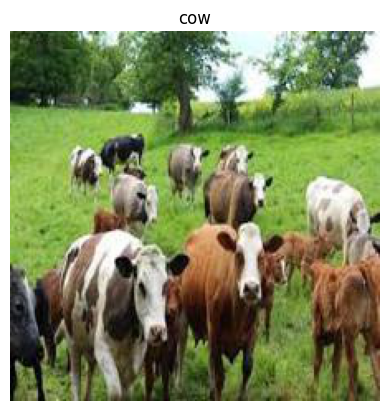

In [55]:

# view Image by using above function
img = view_random_image(target_dir="/content/newDataSet/test/",target_class= "cow")

In [ ]:
# create newDataSet
os.makedirs('/content/newDataSet/train/cow')
os.makedirs('/content/newDataSet/train/buffalo')
os.makedirs('/content/newDataSet/test/cow')
os.makedirs('/content/newDataSet/test/buffalo')

In [12]:
# convert RGBA to RGB channels
from PIL import Image
import os

# Define the target shape for resizing
TARGET_SHAPE = (224, 224)

# Define the source directory containing the original images
source_dir = "/content/dataSet/test/buffalo"

# Define the target directory to save the converted images
target_dir = "/content/newDataSet/test/buffalo"

# Loop through all the images in the source directory
for filename in os.listdir(source_dir):
    image_path = os.path.join(source_dir, filename)

    # Open the image
    image = Image.open(image_path)

    # Convert to RGBA if the image has 4 channels
    if image.mode == "RGBA":
        image = image.convert("RGB")

    # Resize the image to the target shape
    image = image.resize(TARGET_SHAPE)

    # Save the converted image to the target directory
    target_path = os.path.join(target_dir, filename)
    image.save(target_path)

In [13]:
import os
os.system("rm -rf /content/newDataSet/test/.ipynb_checkpoints /content/newDataSet/train/.ipynb_checkpoints /content/newDataSet/.ipynb_checkpoints")

0

In [54]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/newDataSet/train/"
test_dir = "/content/newDataSet/test/"

train_datagen_augmented = ImageDataGenerator(rescale= 1./255,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)
test_datagen_augmented = ImageDataGenerator(rescale= 1./255,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Augmented Training images:")
train_augmented_data = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary",
                                               shuffle = True)

print("Augmented Testing images:")
test_augmented_data = test_datagen_augmented.flow_from_directory(test_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary",
                                               shuffle = True)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary",
                                               shuffle = True)

print("Testing images:")
test_data = test_datagen_augmented.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="binary",
                                             shuffle = True)

Augmented Training images:
Found 1266 images belonging to 2 classes.
Augmented Testing images:
Found 544 images belonging to 2 classes.
Training images:
Found 1266 images belonging to 2 classes.
Testing images:
Found 544 images belonging to 2 classes.


In [55]:
#visuslize the augmented data
img,label = train_data.next()
augmented_img,augmented_label = train_augmented_data.next()

Showing Random Batch Number $8


Text(0.5, 1.0, 'Augmented Image')

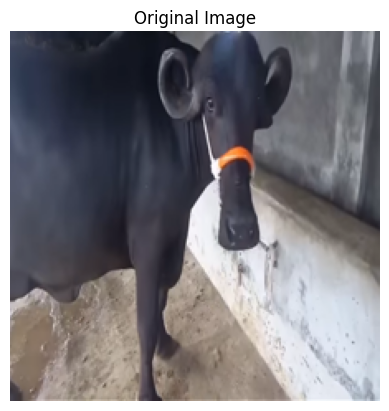

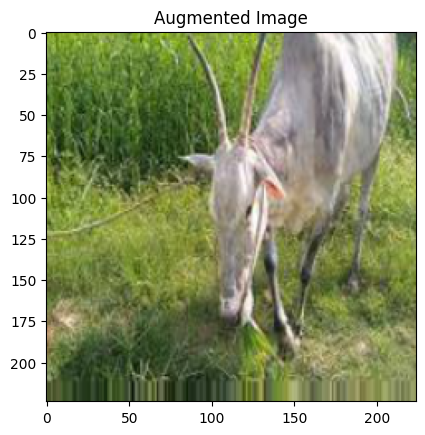

In [58]:
#Visualize and plot the Image
import random
random_number = random.randint(0,32)
print(f"Showing Random Batch Number ${random_number}")
plt.imshow(img[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_img[random_number])
plt.title("Augmented Image")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/cattle_breeds" "/content/drive/MyDrive/binary_cattle_dataSet"

In [21]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [17]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

#https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [33]:
def create_model(model_url, num_classes=1):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  print("enterr")
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
     tf.keras.layers.Dropout(0.5),
    layers.Dense(num_classes, activation='sigmoid', name='output_layer') # create our own output layer
  ])
  return model

In [59]:
from tensorflow.keras import regularizers
# Create model
efficientnet_model = create_model(model_url=efficientnet_url) # use EfficientNetB0 TensorFlow Hub URL)

#regularization_strength = 0.01  # You can adjust this value based on your needs

#for layer in efficientnet_model.layers:
 #   if isinstance(layer, tf.keras.layers.Dense):
  #      layer.kernel_regularizer = regularizers.l2(regularization_strength)

# Compile EfficientNet model
efficientnet_model.compile(loss='binary_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_augmented_data,
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_augmented_data),
                                              validation_data=test_augmented_data,
                                              validation_steps=len(test_augmented_data)
                                              )

enterr
Epoch 1/5
40/40 [==============================] - 39s 692ms/step - loss: 0.5398 - accuracy: 0.7393 - val_loss: 0.3397 - val_accuracy: 0.9320
Epoch 2/5
40/40 [==============================] - 23s 585ms/step - loss: 0.3078 - accuracy: 0.9068 - val_loss: 0.2292 - val_accuracy: 0.9412
Epoch 3/5
40/40 [==============================] - 26s 662ms/step - loss: 0.2307 - accuracy: 0.9352 - val_loss: 0.1853 - val_accuracy: 0.9504
Epoch 4/5
40/40 [==============================] - 23s 590ms/step - loss: 0.1982 - accuracy: 0.9447 - val_loss: 0.1696 - val_accuracy: 0.9467
Epoch 5/5
40/40 [==============================] - 28s 691ms/step - loss: 0.1774 - accuracy: 0.9392 - val_loss: 0.1495 - val_accuracy: 0.9504


In [62]:
efficientnet_model.predict(train_data)

 7/40 [====>.........................] - ETA: 3:06

KeyboardInterrupt: ignored

In [25]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

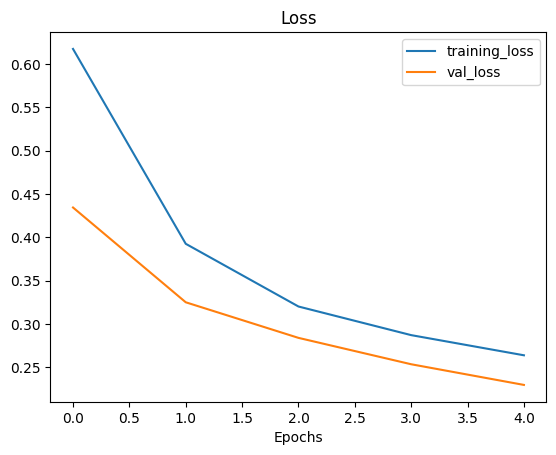

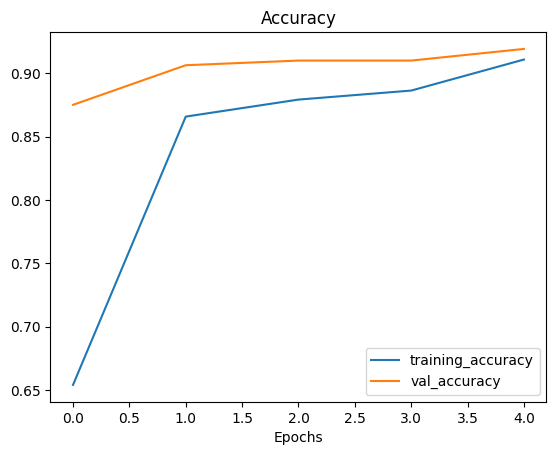

In [35]:
plot_loss_curves(efficientnet_history)

In [95]:
def load_pre_img(filename, img_shape=224):
#Read The Image file
  img = tf.io.read_file(filename)
#Decode the Image File to Tensors
  img = tf.image.decode_image(img)
# Resize to 224
  img = tf.image.resize(img, size=[img_shape,img_shape])
# Convert pixels in binary form i.e 0 and 1 (tensors/pixels are like - [[[64.122][42.42]]]) we need it in 0 and 1 form
  img = img/225.
  return img

In [27]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/newDataSet/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['buffalo' 'cow']


In [ ]:
os.system("rmdir /content/dataSet/val/.ipynb_checkpoints")

0

In [73]:
# Make predictions with model
pred_probs = efficientnet_model.predict(test_augmented_data, verbose=1) # set verbosity to see how long it will take
print(pred_probs)

17/17 [==============================] - 9s 497ms/step
[[0.3027826 ]
 [0.9896225 ]
 [0.23256956]
 [0.98910135]
 [0.03831803]
 [0.9900445 ]
 [0.9682509 ]
 [0.53861505]
 [0.02042358]
 [0.06521586]
 [0.9793788 ]
 [0.04557145]
 [0.03792797]
 [0.9757017 ]
 [0.95170414]
 [0.00156185]
 [0.9749383 ]
 [0.49410638]
 [0.63760257]
 [0.05015326]
 [0.9786587 ]
 [0.9286351 ]
 [0.9391524 ]
 [0.8788902 ]
 [0.06132846]
 [0.05306133]
 [0.02602284]
 [0.91502553]
 [0.4380299 ]
 [0.01951222]
 [0.91095614]
 [0.9773836 ]
 [0.98769146]
 [0.9371195 ]
 [0.03047536]
 [0.98073053]
 [0.02434899]
 [0.09838668]
 [0.20434947]
 [0.69914365]
 [0.98474854]
 [0.08604524]
 [0.9768018 ]
 [0.97409296]
 [0.91214293]
 [0.9657659 ]
 [0.86391777]
 [0.3221125 ]
 [0.05976229]
 [0.9787564 ]
 [0.07571694]
 [0.90033156]
 [0.99428177]
 [0.96656793]
 [0.9890436 ]
 [0.10917395]
 [0.9468985 ]
 [0.97240114]
 [0.7574954 ]
 [0.97215456]
 [0.01391435]
 [0.00720612]
 [0.00616228]
 [0.01806078]
 [0.7769084 ]
 [0.91313195]
 [0.98972017]
 [0.975

In [71]:
print(f"no of prediction in sample 0 :-  {len(pred_probs[0])}")
print(f"how it looks lije - {pred_probs[0]}")
print(f"highest prob - {pred_probs[0].argmax()}")

no of prediction in sample 0 :-  1
how it looks lije - [0.08860033]
highest prob - 0


In [79]:
# Get the class predicitons of each label
#pred_classes = pred_probs
# How do they look?
# Convert pred_probs to a numpy array
pred = np.array(pred_probs)
# Find the index of the class with the highest probability
threshold = 0.5
binary_predictions = np.where(pred >= threshold, 1, 0)
#pred_index = np.argmax(pred)
#print(binary_predictions)
#print(binary_predictions)
binary = np.squeeze(binary_predictions)  # Remove the extra dimension
print(binary)
predicted_class = [class_names[prediction] for prediction in binary]

#print(predicted_class)
# Get the predicted class label
#predicted_class = class_names[binary_predictions]

#print(predicted_class)
#pred_class = class_names[int(tf.round(pred_probs[0]))]
#pred_class[:10]

[0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0
 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 0 0 

In [65]:
pred_probs.shape

(544, 1)

In [83]:
y_labels = []
for i in range(len(test_augmented_data)):
    batch = test_augmented_data[i]
    batch_labels = batch[1]  # Get the labels from the batch
    y_labels.extend(batch_labels.tolist())
    y_labels = [int(x) for x in y_labels]

#y_labels

In [22]:
efficientnet_model.evaluate(test_data)

17/17 [==============================] - 115s 6s/step - loss: 0.1461 - accuracy: 0.9428


[0.14614763855934143, 0.9428044557571411]

In [ ]:
test_data.reset()

In [ ]:
y_labels = []
for i in range(len(test_data)):
    batch = test_data[i]
    batch_labels = batch[1]  # Get the labels from the batch
    y_labels.extend(batch_labels)

y_labels[:10]

[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]

In [31]:
len(y_labels)

245

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, binary,zero_division=1))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47       251
           1       0.55      0.56      0.56       293

    accuracy                           0.51       544
   macro avg       0.51      0.51      0.51       544
weighted avg       0.51      0.51      0.51       544



In [ ]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
pred = efficientnet_model.predict(tf.expand_dims(steak,axis=0))
pred

NameError: ignored

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

NameError: ignored

In [23]:
#helper Function
def predict_img(model,filename,className = class_names):
  #load the data
  img_pred = load_pre_img(filename);

  #now load the model to fit the image
  pred_model = model.predict(tf.expand_dims(img_pred,axis=0))


  # Add in logic for multi-class & get pred_class name
  if len (pred_model[0]) > 1:
    print("Array")
    pred_class = class_names[tf.argmax(pred_model[0])]
  else:
    print("binary")
    pred_class = class_names[int(tf.round(pred_model))]


  #plot the image and predict class
  plt.imshow(img_pred)
  plt.title(f"prediction - {pred_class}")
  plt.axis(False)



1/1 [==============================] - 2s 2s/step


binary


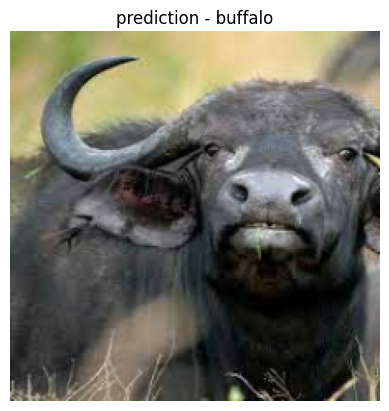

In [26]:
#Finally test
prediction = predict_img(efficientnet_model,"buff.jpeg")
prediction

In [ ]:
pred_probs = efficientnet_model.predict(test_data, verbose=1)

1/1 [==============================] - 0s 104ms/step


In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

NameError: ignored

In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

NameError: ignored

In [ ]:
# Note: This might take a minute or so due to unravelling 790 batches
import tensorflow as tf
import numpy
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))


NameError: ignored